# **Comparing Livability in Three Pittsburgh Neighborhoods**

####           EDA Group 15: Haiyu Xie(haiyux), Yumeng Sha(yumengsh), Shiyu Liu(Shiyul2), Ouyu Han (ouyuh)

### -**Data Source:**
- Population: the Western Pennsylvania Regional Data Center (WPRDC). Specifically, the “2020 Census Redistricting Data Extracts”<br>
- Regional area: “Neighborhoods” (WPRDC)<br>
- Home Value: City of Pittsburgh Open Data<br>
- Crime: the Western Pennsylvania Regional Data Center (WPRDC). Specifically, the “Pittsburgh Police Arrest Data”<br>
- Hospital: the Western Pennsylvania Regional Data Center (WPRDC). Specifically, the “Allegheny County Hospitals”<br>
- Fire Incidents: the Western Pennsylvania Regional Data Center (WPRDC). Specifically, the “Fire Incidents in City of Pittsburgh”<br>
- Public schools: the Western Pennsylvania Regional Data Center (WPRDC). Specifically, the “Pittsburgh Public School Locations”<br>
- Education Level, Green Space and Access to Parks & Roads: U.S. Environmental Protection Agency<br>
- Recreation & Shopping: web scraping from visitpittsburgh.com & data.gov<br>

### - **Research Question:**

#### Carnegie Mellon University and the University of Pittsburgh are situated in Pittsburgh's vibrant urban environment, surrounded by diverse neighborhoods, each with unique characteristics and amenities. For students, faculty, and residents, choosing a neighborhood involves evaluating key factors such as infrastructure, accessibility to essential services, safety, and overall quality of life. Among the neighborhoods surrounding these universities—Oakland, Shadyside, and Squirrel Hill—which offers the best living conditions based on factors like population and house prices, safety and infrastructure, education, green space, transportation, and recreation and shopping?

### - **Conclusion:**

#### This study has come to the conclusion that there's no unanimous answer to the research question. Each attribute has shown an individual answer.
#### Best for Vibrant Urban Living and Real Estate Investment: Shadyside, with diverse amenities, healthcare access, and property value potential.Best for Relaxed, Spacious, and Family-Oriented Living: Squirrel Hill, offering steady growth, green spaces, and community tranquility.Best for Families Prioritizing Education and Proximity to Resources: Oakland, with unique educational support and urban conveniences.

## **1. Population & House pricing**

### data clean: population

In [ ]:
import pandas as pd

# Uploaded CSV file
data = pd.read_csv('population_2010&2020.csv')

# Define the neighborhoods
squirrel_hill_neighborhoods = ['Squirrel Hill North', 'Squirrel Hill South']
oakland_neighborhoods = ['Central Oakland', 'North Oakland', 'South Oakland', 'West Oakland']
shadyside_neighborhood = ['Shadyside']

# Aggregate data
# For Squirrel Hill
squirrel_hill_data = data[data['Neighborhood'].isin(squirrel_hill_neighborhoods)].agg({
    '2010_Total_Population': 'sum',
    '2020_Total_Population': 'sum'
}).rename({
    '2010_Total_Population': '2010 Population',
    '2020_Total_Population': '2020 Population'
})
squirrel_hill_data['Region'] = 'Squirrel Hill'

# For Oakland
oakland_data = data[data['Neighborhood'].isin(oakland_neighborhoods)].agg({
    '2010_Total_Population': 'sum',
    '2020_Total_Population': 'sum'
}).rename({
    '2010_Total_Population': '2010 Population',
    '2020_Total_Population': '2020 Population'
})
oakland_data['Region'] = 'Oakland'

# For Shadyside
shadyside_data = data[data['Neighborhood'].isin(shadyside_neighborhood)].agg({
    '2010_Total_Population': 'sum',
    '2020_Total_Population': 'sum'
}).rename({
    '2010_Total_Population': '2010 Population',
    '2020_Total_Population': '2020 Population'
})
shadyside_data['Region'] = 'Shadyside'

# Combine the results
final_data = pd.DataFrame([squirrel_hill_data, oakland_data, shadyside_data])
final_data = final_data[['Region', '2010 Population', '2020 Population']]

# Save the cleaned data
final_data.to_csv('Merged_Regions_Population.csv', index=False)
print("File saved as: Merged_Regions_Population.csv")
print(final_data)

File saved as: Merged_Regions_Population.csv
          Region  2010 Population  2020 Population
0  Squirrel Hill            26473            27196
1        Oakland            22210            22389
2      Shadyside            13915            15317


In [ ]:
# Uploaded CSV file
area_data = pd.read_csv('area.csv')

# Sum the areas for each region (in square miles)
squirrel_hill_area = area_data[area_data['hood'].isin(squirrel_hill_neighborhoods)]['sqmiles'].sum()
oakland_area = area_data[area_data['hood'].isin(oakland_neighborhoods)]['sqmiles'].sum()
shadyside_area = area_data[area_data['hood'].isin(shadyside_neighborhood)]['sqmiles'].sum()

# Combine the results
area_summary = pd.DataFrame({
    'Region': ['Squirrel Hill', 'Oakland', 'Shadyside'],
    'Area (sq mi)': [squirrel_hill_area, oakland_area, shadyside_area]
})

# Save the results to a CSV file
area_summary.to_csv('Area_Summary.csv', index=False)
print("File saved as: Area_Summary.csv")
print(area_summary)

File saved as: Area_Summary.csv
          Region  Area (sq mi)
0  Squirrel Hill      3.900014
1        Oakland      1.494537
2      Shadyside      0.920161


### data clean:housepricing

In [ ]:
# load the CSV file into a DataFrame
dataframe = pd.read_csv('Opendata.argis.csv')

# region: (Neighborhood)
## Shadyside: Shadyside
## Squirrel Hill: Squirrel Hill South, Squirrel Hill North
## Oakland: Central Oakland, South Oakland, North Oakland, West Oakland
neighborhood_to_region = {
    'Shadyside': 'Shadyside',
    'Squirrel Hill South': 'Squirrel Hill',
    'Squirrel Hill North': 'Squirrel Hill',
    'Central Oakland': 'Oakland',
    'South Oakland': 'Oakland',
    'North Oakland': 'Oakland',
    'West Oakland': 'Oakland'
}
dataframe['Region'] = dataframe['Neighborhood'].map(neighborhood_to_region)

# filter data by specified regions
regions = ['Shadyside', 'Squirrel Hill', 'Oakland']
filtered_data = dataframe[dataframe['Region'].isin(regions)].copy()

# function to clean currency values
def clean_currency(value):
    if isinstance(value, str):
        return value.replace('$', '').replace(',', '')
    return value
filtered_data.loc[:, 'Median Home Value (2000)'] = filtered_data['Median Home Value (2000)'].apply(clean_currency).astype(float)
filtered_data.loc[:, 'Median Home  Value (2010)'] = filtered_data['Median Home  Value (2010)'].apply(clean_currency).astype(float)
filtered_data.loc[:, '% Change Real Value 2000-2010'] = filtered_data['% Change Real Value 2000-2010'].str.replace('%', '').astype(float)

# collect all the variables needed to a dict using regions
wholeregion = {}
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    Median_Home_Value2000 = region_data['Median Home Value (2000)'].mean()
    Median_Home_Value2010 = region_data['Median Home  Value (2010)'].mean()
    Median_Home_Value_Change2000and2010 = region_data['% Change Real Value 2000-2010'].mean()
    wholeregion[region] = {
        'Median Home Value2000': Median_Home_Value2000,
        'Median Home Value2010': Median_Home_Value2010,
        'Median_Home_Value_Change(%)':Median_Home_Value_Change2000and2010
    }

# write it into pd.DataFrame form
result = pd.DataFrame.from_dict(wholeregion).T
result.columns = ['Median Home Value2000', 'Median Home Value2010',
                 'Median_Home_Value_Change(%)']

#write it into csv file
result.to_csv('argis_final.csv')




### data visualization: neighborhood comparison

### **1.1 Population**

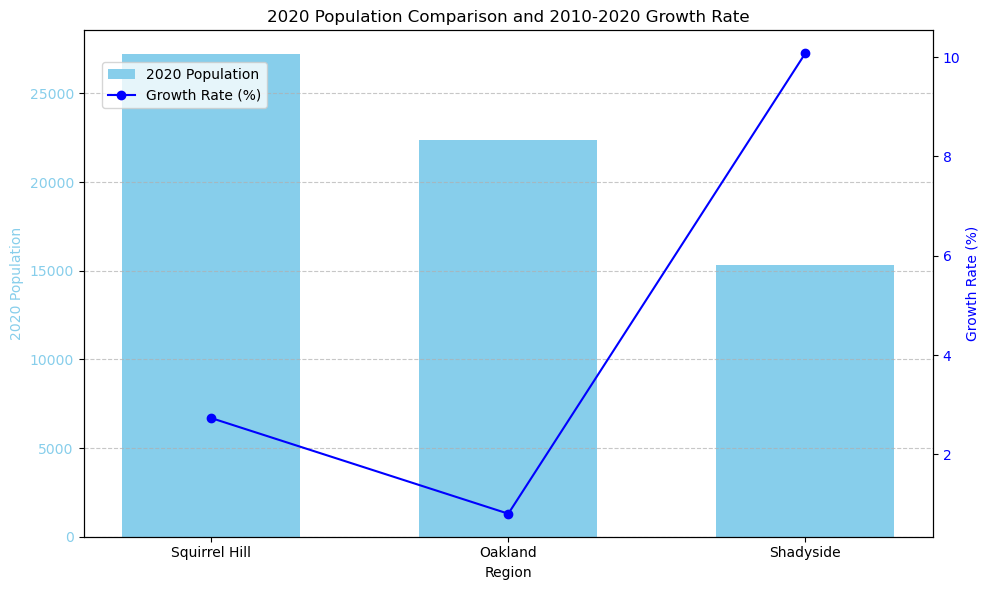

In [ ]:
import matplotlib.pyplot as plt
# Calculate the growth rate
final_data['Growth Rate (%)'] = ((final_data['2020 Population'] - final_data['2010 Population']) /
                                 final_data['2010 Population']) * 100

# Visualization: Bar chart for 2020 population and line plot for growth rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for 2020 population
bar_width = 0.6
ax1.bar(final_data['Region'], final_data['2020 Population'], color='skyblue', width=bar_width, label='2020 Population')
ax1.set_xlabel('Region')
ax1.set_ylabel('2020 Population', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('2020 Population Comparison and 2010-2020 Growth Rate')

# Line plot for growth rate
ax2 = ax1.twinx()
ax2.plot(final_data['Region'], final_data['Growth Rate (%)'], color='blue', marker='o', label='Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### observation1
The graph shows that Squirrel Hill has the highest population in 2020 among the three regions, followed by Oakland and Shadyside. Additionally, Shadyside experienced the most substantial growth rate from 2010 to 2020, while Oakland and Squirrel Hill exhibited a moderate growth rate over the same period.

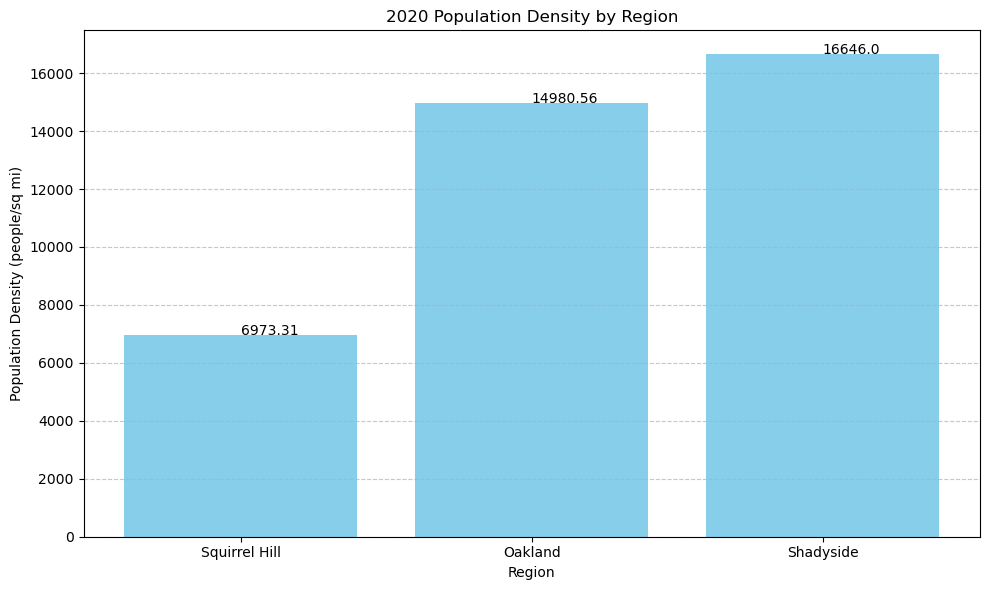

In [ ]:

# Load and merge the data
population_data = pd.read_csv('Merged_Regions_Population.csv')
area_data = pd.read_csv('Area_Summary.csv')
merged_data = pd.merge(population_data, area_data, on='Region')

# Calculate population density in 2020
merged_data['Population Density (people/sq mi)'] = (
    merged_data['2020 Population'] / merged_data['Area (sq mi)']
)

# Plot the population density comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data['Region'], merged_data['Population Density (people/sq mi)'], color='skyblue')

# Add text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),

             fontsize=10, color='black')

plt.title('2020 Population Density by Region')
plt.xlabel('Region')
plt.ylabel('Population Density (people/sq mi)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### observation2
In 2020, Shadyside exhibits the highest population density among the regions compared, significantly surpassing Oakland and Squirrel Hill.

### **1.2 Housepricing**

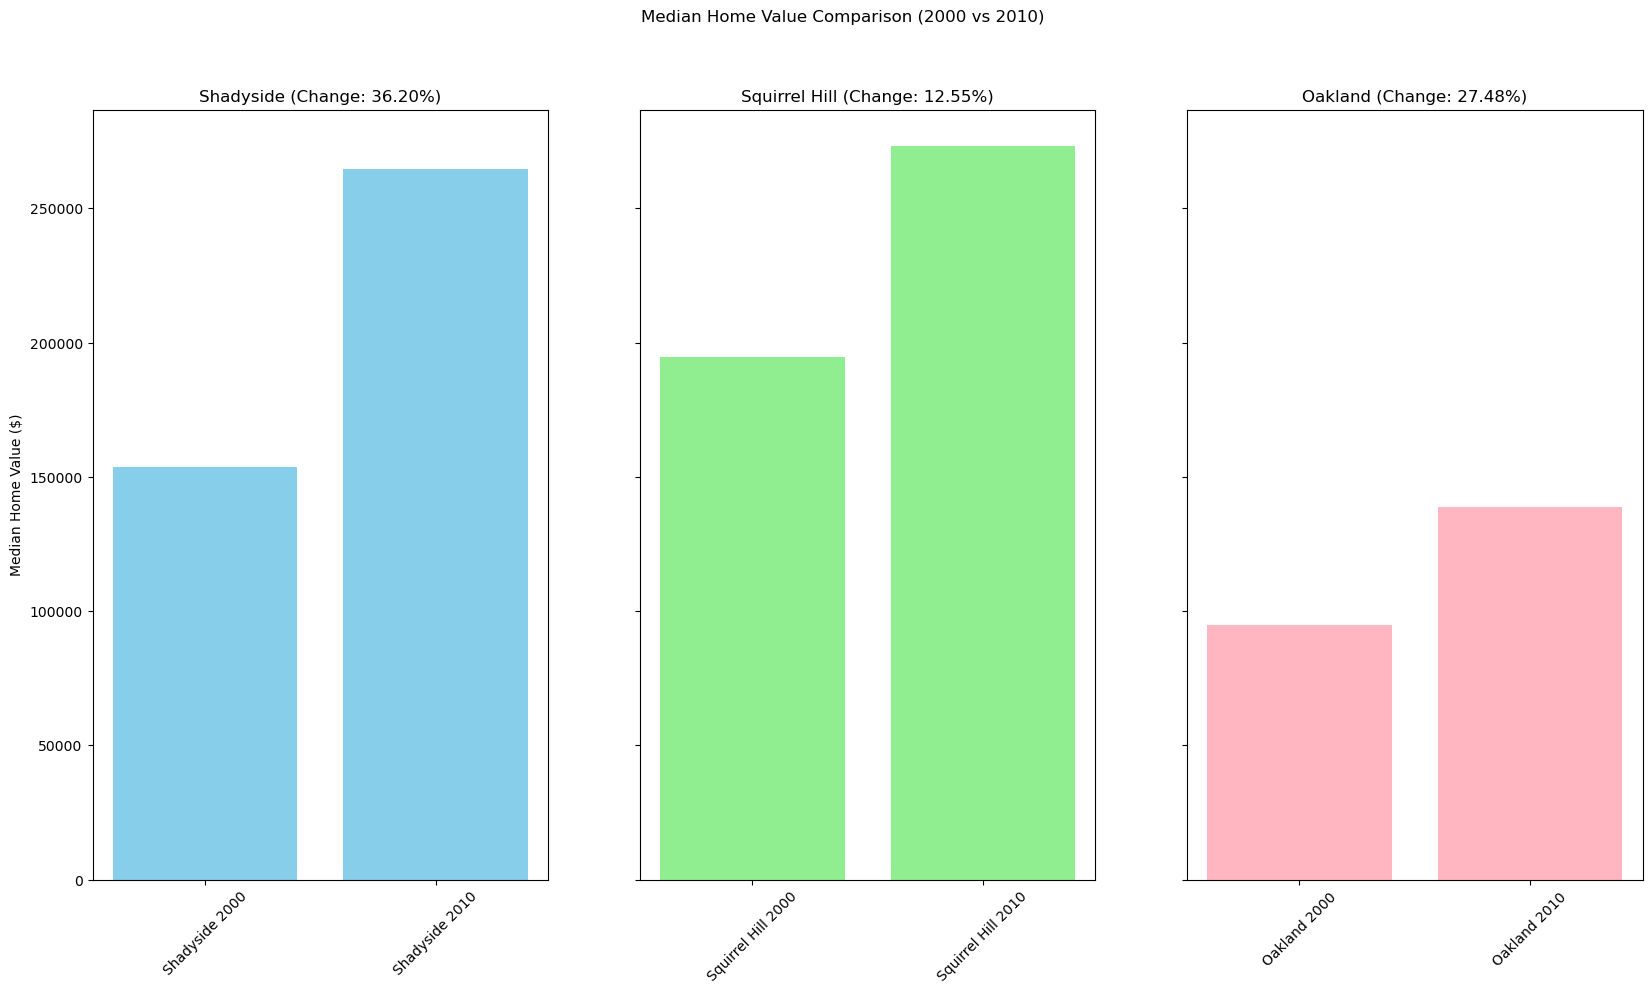

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('argis_final.csv')
data.set_index('Unnamed: 0', inplace=True)

fig = plt.figure(figsize=(20, 10))
axs = fig.subplots(1, 3, sharey=True)

# Shadyside
values_shadyside = [data.loc['Shadyside', 'Median Home Value2000'], data.loc['Shadyside', 'Median Home Value2010']]
change_shadyside = data.loc['Shadyside', 'Median_Home_Value_Change(%)']
axs[0].bar(['Shadyside 2000', 'Shadyside 2010'], values_shadyside, color='skyblue')
axs[0].set_title(f'Shadyside (Change: {change_shadyside:.2f}%)')
axs[0].set_ylabel('Median Home Value ($)')
axs[0].tick_params(axis='x', rotation=45)

# Squirrel Hill
values_squirrel = [data.loc['Squirrel Hill', 'Median Home Value2000'], data.loc['Squirrel Hill', 'Median Home Value2010']]
change_squirrel = data.loc['Squirrel Hill', 'Median_Home_Value_Change(%)']
axs[1].bar(['Squirrel Hill 2000', 'Squirrel Hill 2010'], values_squirrel, color='lightgreen')
axs[1].set_title(f'Squirrel Hill (Change: {change_squirrel:.2f}%)')
axs[1].tick_params(axis='x', rotation=45)

# Oakland
values_oakland = [data.loc['Oakland', 'Median Home Value2000'], data.loc['Oakland', 'Median Home Value2010']]
change_oakland = data.loc['Oakland', 'Median_Home_Value_Change(%)']
axs[2].bar(['Oakland 2000', 'Oakland 2010'], values_oakland, color='lightpink')
axs[2].set_title(f'Oakland (Change: {change_oakland:.2f}%)')
axs[2].tick_params(axis='x', rotation=45)

fig.suptitle('Median Home Value Comparison (2000 vs 2010)')

plt.show()

### observation3
Based on the median home value trends from 2000 to 2010, considering Shadyside might be a good choice as its high median home values and rapid price appreciation, indicating a potentially prosperous and valuable real estate market.

### **Conclusion**

Consider Shadyside for rapid property growth and vibrant living, driven by its leading increase in property values and population density. Oakland and Squirrel Hill offer stable appreciation and a quieter environment, suited for those seeking consistent investments and less crowding.

## **2. Crime, Infrastructure, and Fire Incidents**

### **2.1 Crime**

import pandas as pd
import time

In [ ]:
zipcode_region=pd.read_csv('Zipcode.csv')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

Please enter a region:  Shadyside


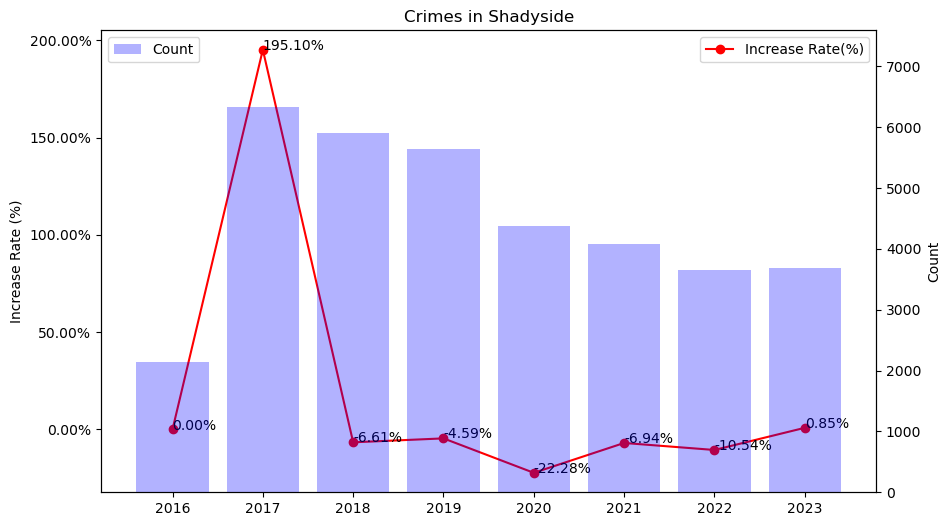

In [ ]:
# Read the crime data CSV
raw_data = pd.read_csv('crime data.csv')

# Extract ZIP codes from INCIDENTLOCATION
raw_data['zipcode'] = raw_data['INCIDENTLOCATION'].str.extract(r'(\b\d{5}\b)')

# Keep rows that have valid ZIP codes
data_cleaned = raw_data.dropna(subset=['zipcode'])

# Convert ARRESTTIME
data_cleaned = data_cleaned.copy()
data_cleaned['ARRESTTIME'] = pd.to_datetime(data_cleaned['ARRESTTIME'], errors='coerce')

data_cleaned = data_cleaned.dropna(subset=['ARRESTTIME'])

# Extract the year from ARRESTTIME
data_cleaned['Year'] = data_cleaned['ARRESTTIME'].dt.year

# Filter data for years between 2016 and 2023
data_cleaned = data_cleaned[(data_cleaned['Year'] >= 2016) & (data_cleaned['Year'] <= 2023)]

# Ensure ZIP codes are strings in both DataFrames
zipcode_region['Zipcode'] = zipcode_region['Zipcode'].astype(str)
data_cleaned['zipcode'] = data_cleaned['zipcode'].astype(str)

# Merge data_cleaned with zipcode_region on ZIP codes
data_cleaned_with_region = pd.merge(
    data_cleaned,
    zipcode_region[['Zipcode', 'Region Name']],
    left_on='zipcode',
    right_on='Zipcode',
    how='inner'
)

# Rename 'Region Name' to 'Region'
data_cleaned_with_region.rename(columns={'Region Name': 'Region'}, inplace=True)

# Group by 'Region' and 'Year'
grouped = data_cleaned_with_region.groupby(['Region', 'Year'])

# Create a summary DataFrame
results = [
    {'Region': name[0], 'Year': name[1], 'Count': len(group)}
    for name, group in grouped
]

region_year = pd.DataFrame(results)

# Add the increase rate column
region_year['Increase Rate(%)'] = region_year.groupby('Region')['Count'].pct_change() * 100

# Define the plot function
def plot():
    # Get unique region names
    unique_regions = zipcode_region['Region Name'].unique()

    # Prompt user for a region
    region_input = input("Please enter a region: ")

    # Validate the input region
    if region_input in unique_regions:
        # Filter data for the selected region
        df = region_year[region_year['Region'] == region_input]

        # Extract plotting data
        count = df['Count'].tolist()
        increase_rate = df['Increase Rate(%)'].fillna(0).tolist()
        year = df['Year'].tolist()

        # Format the y-axis for percentage
        fmt = '%.2f%%'
        yticks = mtick.FormatStrFormatter(fmt)

        # Create the figure and axes
        fig = plt.figure(figsize=(10, 6))
        ax1 = fig.add_subplot(111)

        # Plot increase rate on primary y-axis
        ax1.plot(year, increase_rate, 'or-', label='Increase Rate(%)')
        ax1.yaxis.set_major_formatter(yticks)

        # Annotate points on the increase rate line
        for x, y in zip(year, increase_rate):
            ax1.text(x, y, f'{y:.2f}%', color='black', fontsize=10)

        # Set labels and limits for the primary y-axis
        ax1.set_ylabel('Increase Rate (%)')
        ax1.set_ylim([min(increase_rate) - 10, max(increase_rate) + 10])
        ax1.legend(loc=1)

        # Add count data on a secondary y-axis
        ax2 = ax1.twinx()
        ax2.bar(year, count, alpha=0.3, color='blue', label='Count')
        ax2.set_ylabel('Count')
        ax2.set_ylim([0, max(count) * 1.2])
        ax2.legend(loc=2)

        # Set x-axis labels and title
        plt.xticks(year, [str(y) for y in year])
        plt.title(f'Crimes in {region_input}')

        # Show the plot
        plt.show()

    else:
        print(f"Region '{region_input}' not found. Please enter a valid region.")

# Call the function to plot
plot()


### **Conclusion: Crimes**
In terms of crime, in recent years, Oakland has an average of around 4000 crimes per year, with a generally below zero increase rate, meaning the crimes per year are decreasing.
Shadyside manages to control the crimes below 4000 per year, and the decrease rate excels that of Oakland.
Squirrel Hill 's crimes was over 5000 in 2017, but with a steady decrease, it now arrives at around 3000 in 2023, and the decrease rate is similar with that of Shadyside.
Overall, Squirrel Hill is a relatively safer place among the three regions.

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
year_input = input("Please enter a year (e.g., 2016-2023): ")

# Validate the year input
try:
    year_input = int(year_input)
    if year_input < 2016 or year_input > 2023:
        raise ValueError("Year out of range. Please enter a valid year between 2016 and 2023.")
except ValueError as e:
    print(f"Invalid input: {e}")
    raise

# Filter data for the selected year and valid coordinates
data_cleaned_with_region_cleaned = data_cleaned_with_region[
    (data_cleaned_with_region['Year'] == year_input) &
    data_cleaned_with_region['Y'].notna() &
    data_cleaned_with_region['X'].notna()
]

# Check if there is data to plot
if data_cleaned_with_region_cleaned.empty:
    print(f"No data available for the year {year_input}. Exiting.")
else:
    # Define region-specific colors
    region_colors = {
        'Oakland': 'blue',
        'Shadyside': 'green',
        'Squirrel Hill': 'purple'
    }

    # Add a column for marker colors based on region
    data_cleaned_with_region_cleaned = data_cleaned_with_region_cleaned.copy()
    data_cleaned_with_region_cleaned['MarkerColor'] = data_cleaned_with_region_cleaned['Region'].map(region_colors).fillna('gray')

    # Initialize the map centered around Pittsburgh
    pittsburgh_location = [40.4406, -79.9959]  # Latitude and Longitude of Pittsburgh
    pittsburgh_map = folium.Map(location=pittsburgh_location, zoom_start=12)

    # Use MarkerCluster for better performance
    marker_cluster = MarkerCluster().add_to(pittsburgh_map)

    # Add markers to the cluster
    for _, row in data_cleaned_with_region_cleaned.iterrows():
        folium.Marker(
            [row['Y'], row['X']],
            popup=f"Region: {row['Region']}<br>Location: {row['INCIDENTLOCATION']}",
            icon=folium.Icon(color=row['MarkerColor'], icon="info-sign"),
        ).add_to(marker_cluster)

    # Save the map
    pittsburgh_map.save("pittsburgh_map.html")
    print("The interactive map has been saved as 'pittsburgh_map.html' in your working directory :)")
    print("Oakland is in blue, Shadyside is in green, and Squirrel Hill is in purple.")


Please enter a year (e.g., 2016-2023):  2018


The interactive map has been saved as 'pittsburgh_map.html' in your working directory :)
Oakland is in blue, Shadyside is in green, and Squirrel Hill is in purple.


### **Conclusion: crimes in interative map**
As we can see from the map of Pittsburgh, crimes are relatively concentrated in South Oakland (Downtown) and East Liberty among the three regions we discuss, Thus, we may consider avoiding these regions when relocating.

### **2.2 Hospitals and Schools**

In [ ]:
# Load the Hospitals, Public Schools, and Regions Data
hospitals = pd.read_csv('Hospitals Data.csv')
zipcode_region = pd.read_csv('Pittsburgh Zip Code.csv')
publicschool = pd.read_csv('pps_schools.csv')

# Extract Zip Code from Address and ensure consistent data types for hospitals
hospitals['Zip Code'] = hospitals['Address'].str.extract(r'(\b\d{5}\b)')
zipcode_region['Zipcode'] = zipcode_region['Zipcode'].astype(str)

# Strip and handle missing values for hospitals and public schools
hospitals['Zip Code'] = hospitals['Zip Code'].str.strip().fillna('Unknown').astype(str)
zipcode_region['Zipcode'] = zipcode_region['Zipcode'].str.strip()
publicschool['zip'] = publicschool['zip'].astype(str)
publicschool['zip'] = publicschool['zip'].str.strip().fillna('Unknown').astype(str)

# Merge hospitals and public schools data with zipcode_region to identify targeted areas
hospitals_with_regions = pd.merge(
    hospitals,
    zipcode_region,
    how='left',  # Keep all hospitals, even those without a matching region
    left_on='Zip Code',
    right_on='Zipcode'
)

pubschools_with_regions = pd.merge(
    publicschool,
    zipcode_region,
    how='left',  # Keep all public schools, even those without a matching region
    left_on='zip',
    right_on='Zipcode'
)

# Initialize the map centered around Pittsburgh
pittsburgh_location = [40.4406, -79.9959]  # Latitude and Longitude of Pittsburgh
interactive_map = folium.Map(location=pittsburgh_location, zoom_start=12)

# Add markers for hospitals
for _, row in hospitals_with_regions.iterrows():
    facility_name = row['Facility']
    address = row['Address']
    region_name = row['Region Name']  # This will be NaN for non-targeted areas
    latitude = row['Y']  # Latitude
    longitude = row['X']  # Longitude

    # Determine marker style based on whether the hospital is in a targeted region
    if pd.notna(region_name):  # Highlight targeted areas
        folium.Marker(
            [latitude, longitude],
            popup=f"<b>Hospital:</b> {facility_name}<br>{address}<br>Region: {region_name}",
            icon=folium.Icon(color="red", icon="plus-sign"),
        ).add_to(interactive_map)
    else:
        folium.Marker(
            [latitude, longitude],
            popup=f"<b>Hospital:</b> {facility_name}<br>{address}",
            icon=folium.Icon(color="gray"),
        ).add_to(interactive_map)

# Add markers for public schools
for _, row in pubschools_with_regions.iterrows():
    school_name = row['name']
    address = row['address']
    region_name = row['Region Name']  # This will be NaN for non-targeted areas
    latitude = row['latitude']
    longitude = row['longitude']

    # Determine marker style based on whether the school is in a targeted region
    if pd.notna(region_name):  # Highlight targeted areas
        folium.Marker(
            [latitude, longitude],
            popup=f"<b>Public School:</b> {school_name}<br>{address}<br>Region: {region_name}",
            icon=folium.Icon(color="green", icon="book"),
        ).add_to(interactive_map)
    else:  # Default style for non-targeted areas
        folium.Marker(
            [latitude, longitude],
            popup=f"<b>Public School:</b> {school_name}<br>{address}",
            icon=folium.Icon(color="lightgray"),
        ).add_to(interactive_map)

# Save the map to an HTML file
interactive_map.save("hospital_and_school_map.html")
print("The interactive map with hospitals and public schools, highlighting targeted areas, has been saved as 'hospital_and_school_map.html'")

The interactive map with hospitals and public schools, highlighting targeted areas, has been saved as 'hospital_and_school_map.html'


### **Conclusion: Hospitals and Schools**
Considering the nature of hospitals, we cannot expect a large number of them in the same region. As shown from the map, Oakland has 2 hospitals, Shadyside 1, but with 2 more nearby and Squirrel Hill does not have one in the region. Thus, healthcare is more convenient in Oakland and Shadyside.

Public schools also only reflect part of the story in education. Shadyside and Squirrel Hill has comparable number of public schools while Oakland only has four. However, it is worth noting that most of the public schools are for pre-school to K-5, and the only K6-12 public school is in Shadyside.

### **2.3 Fire Incidents**

In [ ]:
#fires in the three regions
fire = pd.read_csv('Fire Incidents.csv')

# Extract Zipcode from the address column
fire['Zipcode'] = fire['address'].str.extract(r'(\b\d{5}\b)')

fire['alarm_time'] = pd.to_datetime(fire['alarm_time'], errors='coerce')

# Drop rows with invalid 'alarm_term' values
fire = fire[fire['alarm_time'].notna()]

# Extract the year from 'alarm_term' and create a new 'Year' column
fire['Year'] = fire['alarm_time'].dt.year

# Filter data for years between 2016 and 2023
fire = fire[(fire['Year'] >= 2016) & (fire['Year'] <= 2024)]


# Define targeted keywords and region-to-zipcode mapping
target_keywords = ["Oakland", "Shadyside", "Squirrel Hill"]
region_to_zip = {
    'South Oakland': '15213',
    'North Oakland': '15213',
    'Shadyside': '15206',
    'Squirrle Hill': '15217',
    'Squirrel Hill South': '15217',
    'West Okaland': '15213',
    'Squirrel Hill North': '15217',
    'Central Oakland': '15213'
}

# Replace NaN or "Unknown" Zipcode for matching neighborhoods
fire['Zipcode'] = fire.apply(
    lambda row: region_to_zip.get(row['neighborhood'], row['Zipcode'])
    if pd.isna(row['Zipcode']) or row['Zipcode'] == 'Unknown' else row['Zipcode'],
    axis=1
)

# Drop rows with missing Zipcode
fire_cleaned = fire.dropna(subset=['Zipcode'])

# Merge fire incidents with zipcode_region
fires_with_regions = pd.merge(
    fire_cleaned,
    zipcode_region,
    how='inner',
    on='Zipcode'
)

Please enter a region:  Shadyside


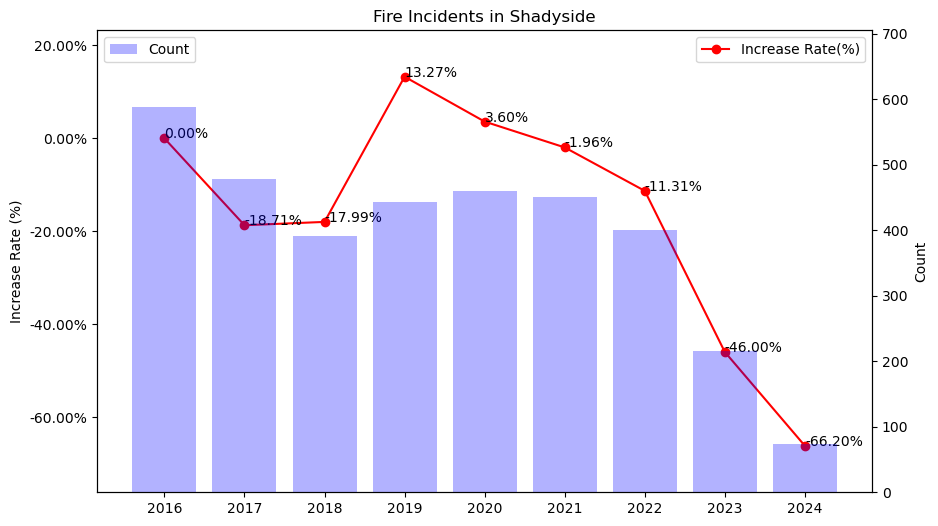

In [ ]:
#draw plots for fire incidents
def plot():
    # Get unique region names from fires_with_regions
    unique_regions = fires_with_regions['Region Name'].unique()

    # Prompt user for a region
    region_input = input("Please enter a region: ")

    # Check if the entered region is valid
    if region_input in unique_regions:
        # Filter fires_with_regions DataFrame for the selected region
        df = fires_with_regions[fires_with_regions['Region Name'] == region_input]

        # Group by Year and count incidents
        df_grouped = df.groupby('Year').size().reset_index(name='Count')

        # Calculate the increase rate (%) year over year
        df_grouped['Increase Rate(%)'] = df_grouped['Count'].pct_change() * 100

        # Extract 'Count', 'Increase Rate(%)', and 'Year' from the grouped DataFrame
        count = df_grouped['Count'].tolist()
        increase_rate = df_grouped['Increase Rate(%)'].fillna(0).tolist()  # Handle NaN values
        year = df_grouped['Year'].tolist()

        # Format y-axis with percentage for Increase Rate
        fmt = '%.2f%%'
        yticks = mtick.FormatStrFormatter(fmt)

        # Create figure and axes
        fig = plt.figure(figsize=(10, 6))
        ax1 = fig.add_subplot(111)

        # Plot Increase Rate on the primary y-axis
        ax1.plot(year, increase_rate, 'or-', label='Increase Rate(%)')
        ax1.yaxis.set_major_formatter(yticks)

        # Annotate data points on the Increase Rate line
        for i, (_x, _y) in enumerate(zip(year, increase_rate)):
            ax1.text(_x, _y, f'{increase_rate[i]:.2f}%', color='black', fontsize=10)

        # Set legend and labels for Increase Rate
        ax1.legend(loc=1)
        ax1.set_ylim([min(increase_rate) - 10, max(increase_rate) + 10])  # Dynamically adjust y-limits
        ax1.set_ylabel('Increase Rate (%)')

        # Secondary y-axis for 'Count'
        ax2 = ax1.twinx()
        ax2.bar(year, count, alpha=0.3, color='blue', label='Count')
        ax2.set_ylim([0, max(count) * 1.2])  # Dynamically adjust y-limits
        ax2.set_ylabel('Count')

        # Set legend and labels for 'Count'
        ax2.legend(loc=2)

        # Set x-axis labels for years
        plt.xticks(year, [str(y) for y in year])
        plt.title(f'Fire Incidents in {region_input}')

        # Show the plot
        plt.show()

    else:
        print(f"Region '{region_input}' not found. Please enter a valid region.")

# Call the function to plot
plot()

### **Conclusion: fire incidents in the three region**
All the three regions experience a significant decrease in the number of fire incidents per year.
Oakland had around 450 fires in 2019-2022, and decreased to around 250 in 2023, and less than 100 in 2024.
Shadyside had around 400 fires in 2019-2022, dropped to around 200 in 2023, and less than 100 in 2024.
Squirrel Hill had around 450 fires in 2019-2022, but decreased to 200 in 2023, and less than 100 in 2024.
However, as it is still about one month left in 2024, the number is likely to increase (even significantly) in the following days, for winter is when fires happen a lot.
Overall, the three regions all controlled fire fairly well, perhpas due to improvement in the firehouse in Pittsburgh Region as a whole. Shadyside may be slightly better, but the differences are trivial.

## **3. Education Level, Green Space, Park Access, and Transportation**

### **3.1 Education Level**

In [ ]:
import pandas as pd

file_path = "C:\\Users\\lsy\\Desktop\\City_of_Pittsburgh_Neighborhoods.csv"
df = pd.read_csv(file_path)

filtered_rows = df[df['HOOD'].str.contains('ShadySide', case=False, na=False)]
geoid10_values = filtered_rows['GEOID10']
print("The bgrp (group numbers) of the Shadyside community are as follows:")
print(geoid10_values)

filtered_rows = df[df['HOOD'].str.contains('Squirrel Hill', case=False, na=False)]
geoid10_values = filtered_rows['GEOID10']
print("The bgrp (group numbers) of the Squirrel Hill community are as follows:")
print(geoid10_values)

filtered_rows = df[df['HOOD'].str.contains('Oakland', case=False, na=False)]
geoid10_values = filtered_rows['GEOID10']
print("The bgrp (group numbers) of the Oakland community are as follows:")
print(geoid10_values)

The bgrp (group numbers) of the Shadyside community are as follows:
57    420030709002
Name: GEOID10, dtype: int64
The bgrp (group numbers) of the Shadyside community are as follows:
25    420031414003
65    420031401003
Name: GEOID10, dtype: int64
The bgrp (group numbers) of the Shadyside community are as follows:
0     420030405001
1     420030404001
2     420030402002
22    420030409003
Name: GEOID10, dtype: int64


In [ ]:
df['bgrp'] = df['bgrp'].str.strip()
df['bgrp'] = df['bgrp'].astype(str)


shadyside_bgrp = ["420030709002"]
squirrel_hill_bgrp = ["420031414003", "420031401003"]
oakland_bgrp = ["420030405001", "420030404001", "420030402002", "420030409003"]

shadyside_data = df[df['bgrp'].isin(shadyside_bgrp)]
squirrel_hill_data = df[df['bgrp'].isin(squirrel_hill_bgrp)]
oakland_data = df[df['bgrp'].isin(oakland_bgrp)]


shadyside_data['Community'] = 'Shadyside'
squirrel_hill_data['Community'] = 'Squirrel Hill'
oakland_data['Community'] = 'Oakland'


comparison_table = pd.concat([shadyside_data, squirrel_hill_data, oakland_data])

comparison_table = comparison_table[['Community', 'bgrp', 'Day_Count', 'Day_Low', 'K12_Count', 'K12_Low']]

print(comparison_table)
save_path = r"C:\\Users\\lsy\\Desktop\\PitPA_metrics_Apr2020_CSV_Shapes\\community_education_comparison.csv"
comparison_table.to_csv(save_path, index=False)

#Day_Count: The total number of daytime services or activities available in the block.
#Day_Low: The count of low-quality daytime services or activities in the block.
#K12_Count: The total number of K12 educational resources or activities in the block.
#K12_Low: The count of low-quality K12 educational resources or activities in the block.

         Community          bgrp  Day_Count  Day_Low  K12_Count  K12_Low
48       Shadyside  420030709002        0.0 -99999.0        0.0 -99999.0
123  Squirrel Hill  420031401003        0.0 -99999.0        0.0 -99999.0
150  Squirrel Hill  420031414003        0.0 -99999.0        0.0 -99999.0
14         Oakland  420030402002        1.0      1.0        2.0      0.0
15         Oakland  420030404001        0.0 -99999.0        0.0 -99999.0
17         Oakland  420030405001        0.0 -99999.0        0.0 -99999.0
22         Oakland  420030409003        0.0 -99999.0        0.0 -99999.0


C:\Users\lsy\AppData\Local\Temp\ipykernel_20784\279560982.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shadyside_data['Community'] = 'Shadyside'
C:\Users\lsy\AppData\Local\Temp\ipykernel_20784\279560982.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squirrel_hill_data['Community'] = 'Squirrel Hill'
C:\Users\lsy\AppData\Local\Temp\ipykernel_20784\279560982.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### **Conclusion:**
Oakland has certain educational resource support in some blocks, particularly the block with bgrp: 420030402002, which is suitable for family living.

### **3.2 Green Space**

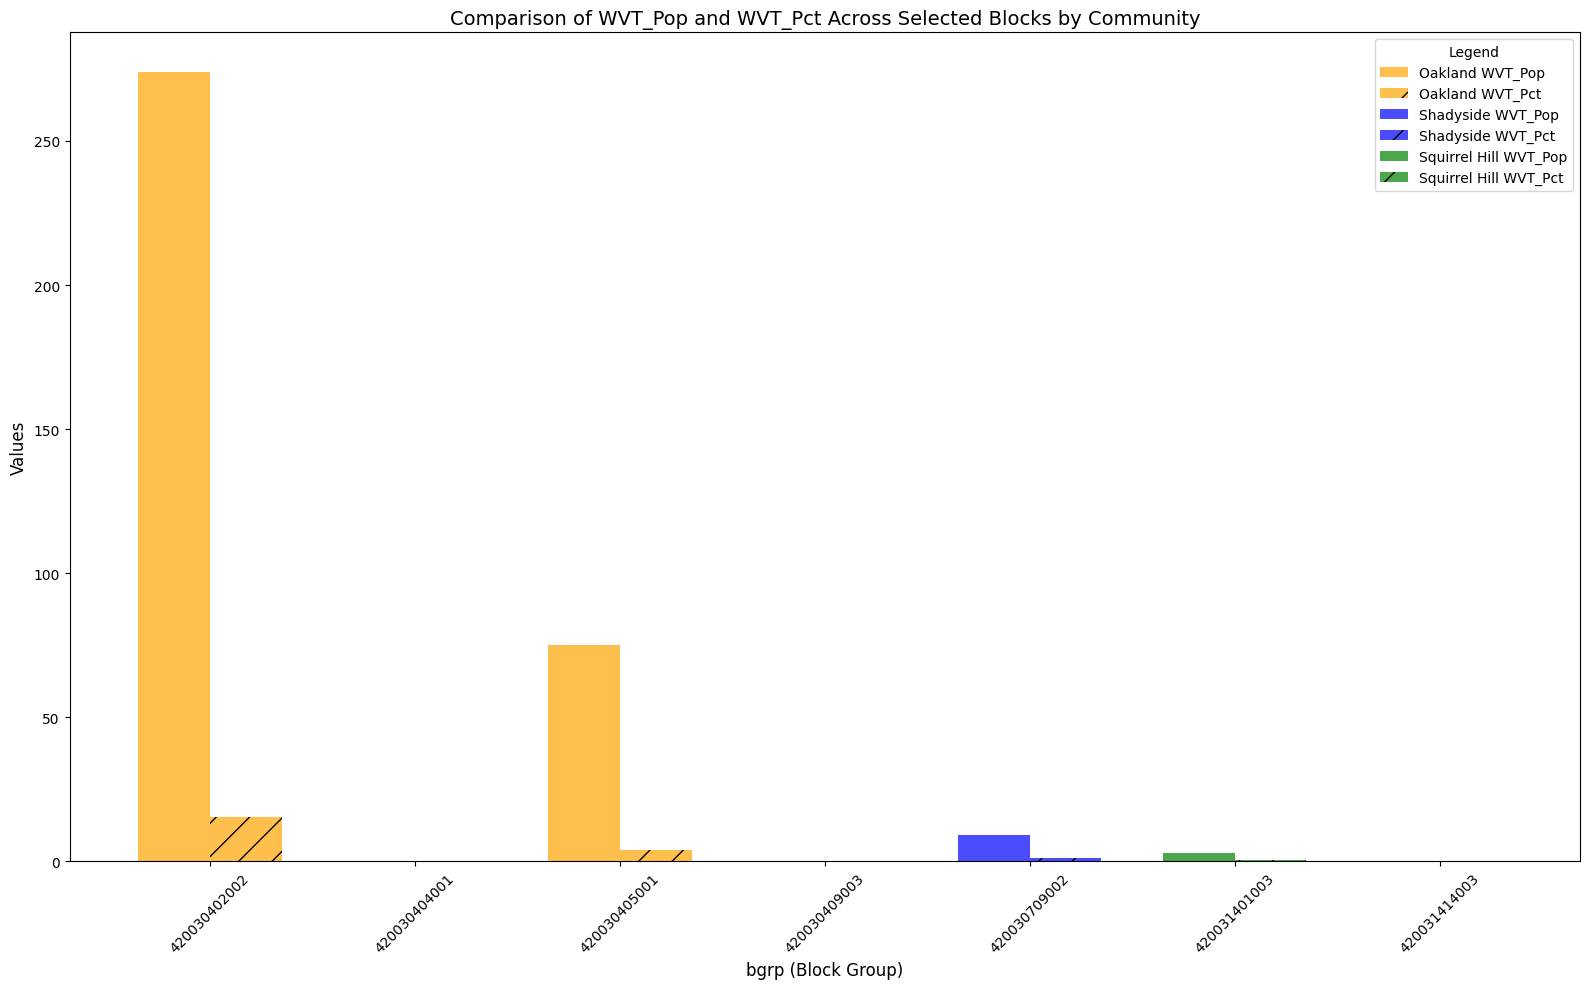

In [ ]:

import matplotlib.pyplot as plt

# Load the new file
file_path = "C:\\Users\\lsy\\Desktop\\PitPA_metrics_Apr2020_CSV_Shapes\\PitPA_TreeWV.csv"
df = pd.read_csv(file_path)

# Ensure bgrp is a string and strip any whitespace
df['bgrp'] = df['bgrp'].astype(str).str.strip()

# Community mapping
community_mapping = {
    "Shadyside": ["420030709002"],
    "Squirrel Hill": ["420031414003", "420031401003"],
    "Oakland": ["420030405001", "420030404001", "420030402002", "420030409003"]
}

# Add a community column
df['Community'] = None
for community, bgrps in community_mapping.items():
    df.loc[df['bgrp'].isin(bgrps), 'Community'] = community

# Filter relevant data
filtered_data = df[df['Community'].notnull()]

# Ensure necessary columns exist
if all(col in filtered_data.columns for col in ['WVT_Pop', 'WVT_Pct']):
    # Define colors
    colors = {
        "Shadyside": "blue",
        "Squirrel Hill": "green",
        "Oakland": "orange"
    }

    # Prepare data for plotting
    x_labels = filtered_data['bgrp']
    wvt_pop = filtered_data['WVT_Pop']
    wvt_pct = filtered_data['WVT_Pct']
    communities = filtered_data['Community']

    plt.figure(figsize=(16, 10))
    bar_width = 0.35
    x_indices = range(len(x_labels))

    # Plot bar chart for each community
    added_communities = set()
    for i, (x, pop, pct, community) in enumerate(zip(x_indices, wvt_pop, wvt_pct, communities)):
        # Add legend only once per community
        label_pop = f'{community} WVT_Pop' if community not in added_communities else ""
        label_pct = f'{community} WVT_Pct' if community not in added_communities else ""
        added_communities.add(community)

        # Plot bars
        plt.bar(x - bar_width / 2, pop, width=bar_width, color=colors[community], label=label_pop, alpha=0.7)
        plt.bar(x + bar_width / 2, pct, width=bar_width, color=colors[community], label=label_pct, alpha=0.7, hatch='/')

    # Set labels and title
    plt.xlabel('bgrp (Block Group)', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.title('Comparison of WVT_Pop and WVT_Pct Across Selected Blocks by Community', fontsize=14)
    plt.xticks([x for x in x_indices], x_labels, rotation=45)

    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), title="Legend")

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns.")



#WVT_Pop: The total population weighted by tree canopy within the block group.
#WVT_Pct: The percentage of the population weighted by tree canopy within the block group.
#In the Oakland community, among the four blocks, bgrp: 420030402002 exhibits exceptionally high WVT_Pop and WVT_Pct values.

### **Conclusion:**
Oakland has the highest absolute population values, especially for the BWDP group, but its percentages suggest these groups are smaller relative to the total population. Shadyside and Squirrel Hill show lower population values but higher proportional representation of IWDP and BWDP groups. The block group `420030402002` in Oakland stands out with exceptionally high IWDP values, warranting further investigation.

### **3.3 Access to Parks**

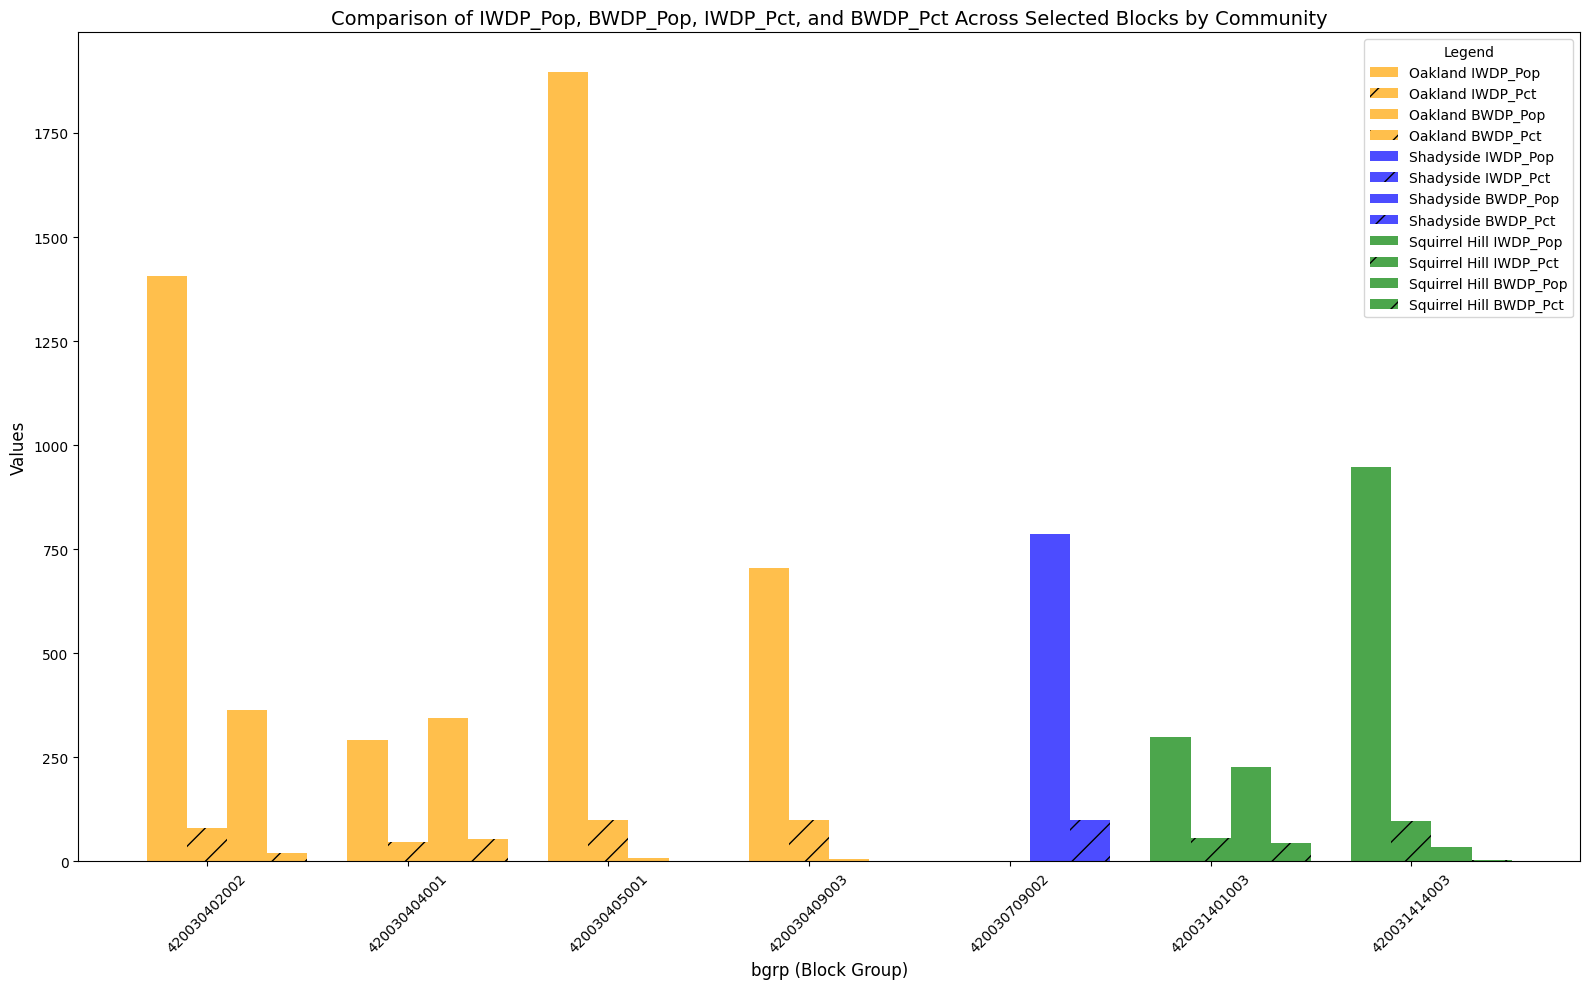

In [ ]:

file_path = "C:\\Users\\lsy\\Desktop\\PitPA_metrics_Apr2020_CSV_Shapes\\PitPA_Park_Pop.csv"
df = pd.read_csv(file_path)

df['bgrp'] = df['bgrp'].astype(str).str.strip()


community_mapping = {
    "Shadyside": ["420030709002"],
    "Squirrel Hill": ["420031414003", "420031401003"],
    "Oakland": ["420030405001", "420030404001", "420030402002", "420030409003"]
}

df['Community'] = None
for community, bgrps in community_mapping.items():
    df.loc[df['bgrp'].isin(bgrps), 'Community'] = community


filtered_data = df[df['Community'].notnull()]


if all(col in filtered_data.columns for col in ['IWDP_Pop', 'BWDP_Pop', 'IWDP_Pct', 'BWDP_Pct']):

    colors = {
        "Shadyside": "blue",
        "Squirrel Hill": "green",
        "Oakland": "orange"
    }


    x_labels = filtered_data['bgrp']
    iwdp_pop = filtered_data['IWDP_Pop']
    bwdp_pop = filtered_data['BWDP_Pop']
    iwdp_pct = filtered_data['IWDP_Pct']
    bwdp_pct = filtered_data['BWDP_Pct']
    communities = filtered_data['Community']

    plt.figure(figsize=(16, 10))
    bar_width = 0.2
    x_indices = range(len(x_labels))


    added_communities = set()
    for i, (x, iwdp, bwdp, iwdp_p, bwdp_p, community) in enumerate(zip(x_indices, iwdp_pop, bwdp_pop, iwdp_pct, bwdp_pct, communities)):

        label_pop = f'{community} IWDP_Pop' if community not in added_communities else ""
        label_pct = f'{community} IWDP_Pct' if community not in added_communities else ""
        label_bwdp_pop = f'{community} BWDP_Pop' if community not in added_communities else ""
        label_bwdp_pct = f'{community} BWDP_Pct' if community not in added_communities else ""
        added_communities.add(community)

        plt.bar(x - bar_width, iwdp, width=bar_width, color=colors[community], label=label_pop, alpha=0.7)
        plt.bar(x, iwdp_p, width=bar_width, color=colors[community], label=label_pct, alpha=0.7, hatch='/')
        plt.bar(x + bar_width, bwdp, width=bar_width, color=colors[community], label=label_bwdp_pop, alpha=0.7)
        plt.bar(x + 2 * bar_width, bwdp_p, width=bar_width, color=colors[community], label=label_bwdp_pct, alpha=0.7, hatch='/')

    plt.xlabel('bgrp (Block Group)', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.title('Comparison of IWDP_Pop, BWDP_Pop, IWDP_Pct, and BWDP_Pct Across Selected Blocks by Community', fontsize=14)
    plt.xticks([x for x in x_indices], x_labels, rotation=45)

    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), title="Legend")

    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns.")


#IWDP_Pop: Population of individuals living in the block group who belong to a specific category related to parks (e.g., people within walking distance to parks, or "In Walking Distance Population").
#BWDP_Pop: Population of individuals who are beyond walking distance to parks in the block group.
#IWDP_Pct: Percentage of the block group population that is within walking distance to parks.
#BWDP_Pct: Percentage of the block group population that is beyond walking distance to parks.

### **Conclusion:**
Oakland has the highest absolute population values, especially for the BWDP group, but its percentages suggest these groups are smaller relative to the total population. Shadyside and Squirrel Hill show lower population values but higher proportional representation of IWDP and BWDP groups. The block group `420030402002` in Oakland stands out with exceptionally high IWDP values, warranting further investigation.

### **3.3 Transportation and Accessibility**

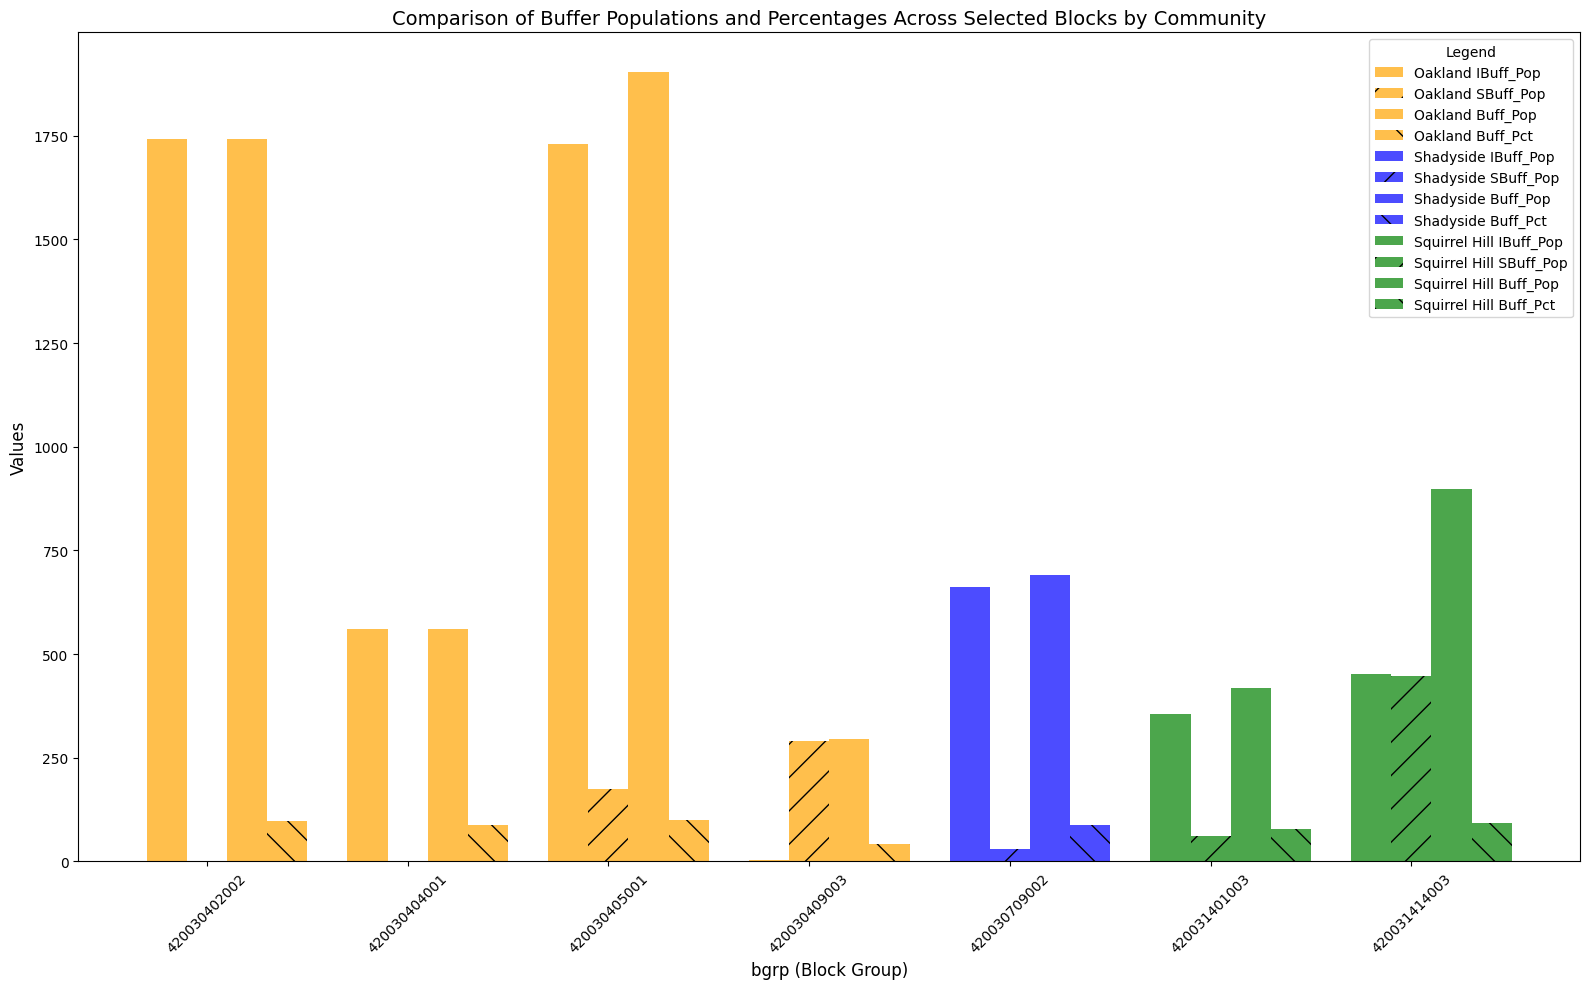

In [ ]:
file_path = "C:\\Users\\lsy\\Desktop\\PitPA_metrics_Apr2020_CSV_Shapes\\PitPA_NrRd_Pop.csv"
df = pd.read_csv(file_path)

df['bgrp'] = df['bgrp'].astype(str).str.strip()

# Community mapping
community_mapping = {
    "Shadyside": ["420030709002"],
    "Squirrel Hill": ["420031414003", "420031401003"],
    "Oakland": ["420030405001", "420030404001", "420030402002", "420030409003"]
}

# Add a community column
df['Community'] = None
for community, bgrps in community_mapping.items():
    df.loc[df['bgrp'].isin(bgrps), 'Community'] = community

# Filter relevant data
filtered_data = df[df['Community'].notnull()]

# Ensure necessary columns exist
if all(col in filtered_data.columns for col in ['IBuff_Pop', 'SBuff_Pop', 'Buff_Pop', 'Buff_Pct']):
    # Define colors
    colors = {
        "Shadyside": "blue",
        "Squirrel Hill": "green",
        "Oakland": "orange"
    }

    # Prepare data for plotting
    x_labels = filtered_data['bgrp']
    ibuff_pop = filtered_data['IBuff_Pop']
    sbuff_pop = filtered_data['SBuff_Pop']
    buff_pop = filtered_data['Buff_Pop']
    buff_pct = filtered_data['Buff_Pct']
    communities = filtered_data['Community']

    plt.figure(figsize=(16, 10))
    bar_width = 0.2
    x_indices = range(len(x_labels))

    # Plot bar chart for each community
    added_communities = set()
    for i, (x, ibuff, sbuff, total, pct, community) in enumerate(zip(x_indices, ibuff_pop, sbuff_pop, buff_pop, buff_pct, communities)):
        # Add legend only once per community
        label_ibuff = f'{community} IBuff_Pop' if community not in added_communities else ""
        label_sbuff = f'{community} SBuff_Pop' if community not in added_communities else ""
        label_total = f'{community} Buff_Pop' if community not in added_communities else ""
        label_pct = f'{community} Buff_Pct' if community not in added_communities else ""
        added_communities.add(community)

        # Plot bars
        plt.bar(x - bar_width, ibuff, width=bar_width, color=colors[community], label=label_ibuff, alpha=0.7)
        plt.bar(x, sbuff, width=bar_width, color=colors[community], label=label_sbuff, alpha=0.7, hatch='/')
        plt.bar(x + bar_width, total, width=bar_width, color=colors[community], label=label_total, alpha=0.7)
        plt.bar(x + 2 * bar_width, pct, width=bar_width, color=colors[community], label=label_pct, alpha=0.7, hatch='\\')

    # Set labels and title
    plt.xlabel('bgrp (Block Group)', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.title('Comparison of Buffer Populations and Percentages Across Selected Blocks by Community', fontsize=14)
    plt.xticks([x for x in x_indices], x_labels, rotation=45)

    # Add legend
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), title="Legend")

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns.")

#IBuff_Pop: Population within the inner buffer zone.
#SBuff_Pop: Population within the secondary buffer zone.
#Buff_Pop: Total population within both the inner and secondary buffer zones combined.
#Buff_Pct: Percentage of the total block group population located within the buffer zones.
#Lane_PctSB: Percentage of street lanes located within the secondary buffer zone.
#Lane_PctIB: Percentage of street lanes located within the inner buffer zone.

### **Conclusion:**
Oakland shows the highest buffer populations, especially in the inner buffer zones, with consistently high coverage percentages (Buff_Pct). In contrast, Shadyside and Squirrel Hill have smaller and more distributed populations, with Squirrel Hill showing slightly higher secondary buffer populations. This suggests Oakland's buffer zones are densely populated, while Shadyside and Squirrel Hill may benefit from improved secondary buffer coverage.

## **4. Recreation, Supermarkets, and Convenience Store**

### Use web scraping to obtain recreation data, including park and event

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# Launch the browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Base URL
base_url = "https://www.visitpittsburgh.com/things-to-do/outdoor-adventure?page="

# Store the scraped data
data = []

# Loop through pages
for page_num in range(1, 4):  # Assuming we want to scrape pages 1-3
    url = base_url + str(page_num)
    driver.get(url)

    # Wait for the page to fully load
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "card__main"))
    )

    # Scroll down the page to ensure dynamically loaded content is displayed
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(10)  # Wait for the content to load

    # Re-locate the card elements to avoid StaleElementReferenceException
    cards = driver.find_elements(By.CLASS_NAME, "card__main")

    for card in cards:
        try:
            # Retrieve the title
            heading = card.find_element(By.CLASS_NAME, "card__heading").text

            # Retrieve the address, use a default value if not found
            address = card.find_element(By.CLASS_NAME, "card__address").text
            if not address:  # If the address is empty
                address = "No address found"

            # Add the data to the list
            data.append([heading, address])
        except Exception as e:
            print(f"Error finding card elements: {e}")

# Close the browser
driver.quit()

# Save the data to a CSV file
with open('outdoor_adventure.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Heading', 'Address'])

    # Write all the scraped data
    writer.writerows(data)

### Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
recreation = pd.read_csv('event+park.csv')
zip = pd.read_csv('zipcode.csv')
super = pd.read_csv('supermarkets.csv')[['Heading', 'Zipcode','Category']]

In [ ]:
super.shape

(672, 3)

In [ ]:
recreation = pd.concat([recreation, super], ignore_index=True)
# concatenating two files, enlarging the database to include park, event, supermarket, and convenience store data

In [ ]:
recreation.to_csv('recreation_file.csv', index=False)

In [ ]:
merged_df = recreation.merge(zip, on='Zipcode', how='left')
# Merging the recreation file with zip code file to add a 'Region Name' column

In [ ]:
merged_df.to_csv('recreation_with_neighborhood.csv', index=False)

In [ ]:
print(merged_df)

                            Heading  \
0     Indiana County Tourist Bureau   
1                   ASCEND Climbing   
2                   ASCEND Climbing   
3                   ASCEND Climbing   
4                  Kayak Pittsburgh   
...                             ...   
1190                       Aldi #80   
1191                 Wal-Mart #2603   
1192                 Wal-Mart #5040   
1193                 Wal-Mart #5339   
1194                            NaN   

                                                Address  Zipcode     Category  \
0     Indiana Mall, 2334 Oakland Ave.\nIndiana, Penn...  15701.0     cultural   
1         2141 Mary St.\nPittsburgh, Pennsylvania 15203  15203.0      fitness   
2         2141 Mary St.\nPittsburgh, Pennsylvania 15203  15203.0      fitness   
3         2141 Mary St.\nPittsburgh, Pennsylvania 15203  15203.0      fitness   
4     317 East Carson St., Ste.160\nPittsburgh, Penn...  15219.0      fitness   
...                                          

In [ ]:
dfnomiss = merged_df.dropna(subset=['Zipcode','Region Name']) # Deleting missing values

In [ ]:
dfnomiss.shape

(528, 5)

In [ ]:
dfnomiss.duplicated() #checking for duplicates

1       False
2       False
3       False
4       False
5       False
        ...  
1186    False
1187    False
1188    False
1189    False
1190    False
Length: 528, dtype: bool

## Data Visualization

### **4.1 Recreation Category by Neighborhood (Stacked)**

In [ ]:
category_counts = dfnomiss.groupby(['Region Name', 'Category']).size().unstack(fill_value=0)

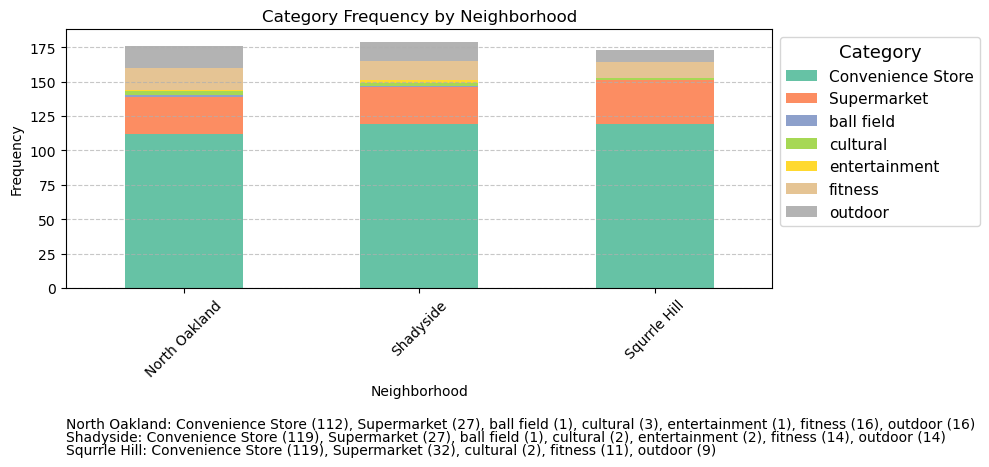

In [ ]:
ax = category_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Category Frequency by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Category', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Prepare detailed annotations for a side legend
annotations = []
for neighborhood, category_data in category_counts.iterrows():
    details = f"{neighborhood}: " + ", ".join(f"{cat} ({int(freq)})" for cat, freq in category_data.items() if freq > 0)
    annotations.append(details)

# Add annotations as text below the plot to avoid overlap
for i, detail in enumerate(annotations):
    plt.text(0, -0.5 - i * 0.05, detail, fontsize=10, color='black', va='top', ha='left', transform=plt.gca().transAxes)

plt.tight_layout()  # Optimize the layout of the plot
plt.show()

### **Conclusion:**
The recreational facilities across the three regions do not show significant differences overall, with convenience stores and supermarkets comprising the majority of recreational amenities. Notably, the 'entertainment' category is absent in the Squirrel Hill region, likely due to the predominantly older demographic of its residents.

### **4.2 Category within each neighborhood**

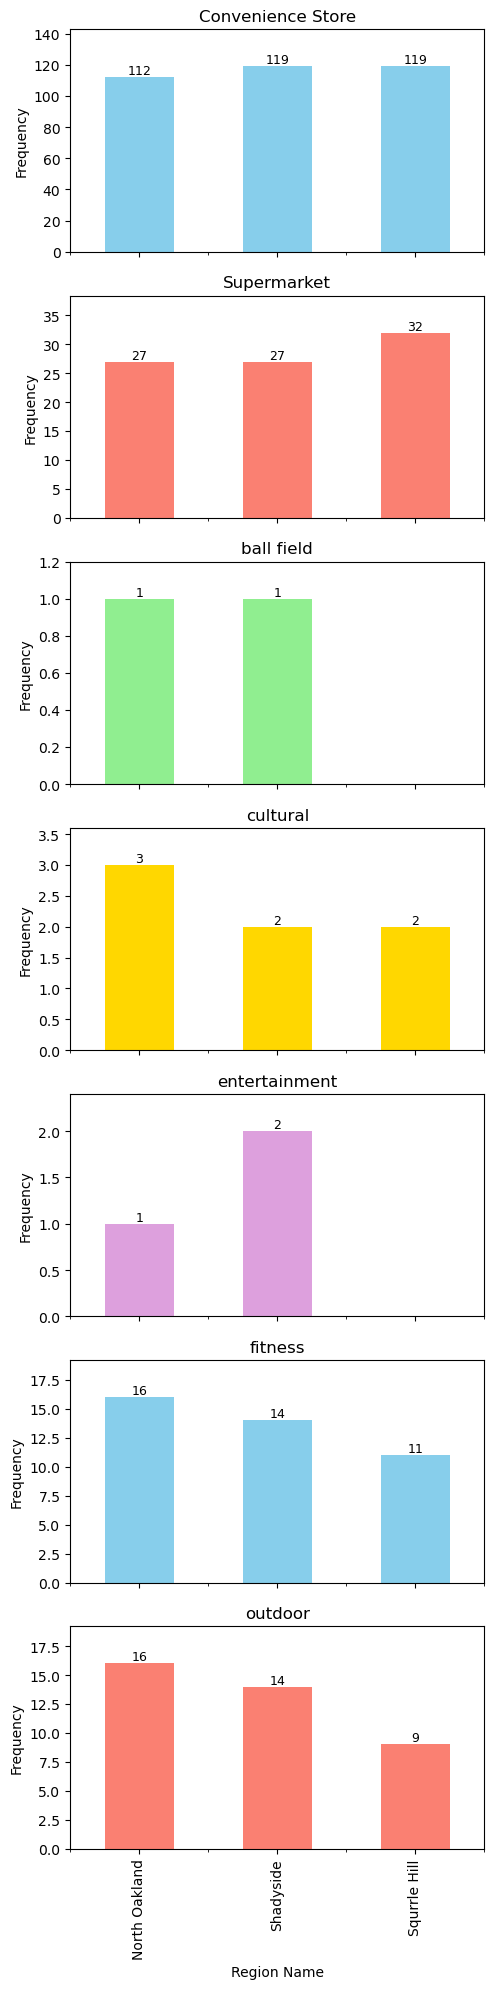

In [ ]:
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'plum']  # Define the color list
fig, axes = plt.subplots(nrows=category_counts.shape[1], ncols=1, figsize=(5, 20), sharex=True)

for i, category in enumerate(category_counts.columns):
    color = colors[i % len(colors)]  # Choose a color for each subplot
    ax = axes[i]  # Current subplot
    category_counts[category].plot(ax=ax, kind='bar', color=color, title=category)
    ax.set_ylabel('Frequency')
    max_value = category_counts[category].max()
    ax.set_ylim(0, max_value * 1.2)

    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Ensure the height is positive
            x = p.get_x() + p.get_width() / 2  # Center position of the bar
            y = height
            ax.annotate(f'{height:.0f}', (x, y), ha='center', va='bottom', fontsize=9, color='black')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()

### **Conclusion:**
The graph shows that squrriel hill has more supermarkets than the other two regions, but the number of ball fields, entertainment facilities, and outdoor facilities are less than the other two regions.

### **4.3 Supermarket and convenience store by neighborhood**

In [ ]:
dfnomiss.loc[dfnomiss['Heading'].str.contains('Giant Eagle', regex=True), 'Heading'] = 'Giant Eagle'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Aldi', regex=True), 'Heading'] = 'Aldi'
dfnomiss.loc[dfnomiss['Heading'].str.contains("Shop 'n Save", regex=True), 'Heading'] = "Shop 'n Save"
dfnomiss.loc[dfnomiss['Heading'].str.contains("Trader Joe's", regex=True), 'Heading'] = "Trader Joe's"
dfnomiss.loc[dfnomiss['Heading'].str.contains('American Natural', regex=True), 'Heading'] = 'American Natural'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Whole Foods', regex=True), 'Heading'] = 'Whole Foods'
dfnomiss.loc[dfnomiss['Heading'].str.contains('7 Eleven', regex=True), 'Heading'] = '7 Eleven'
dfnomiss.loc[dfnomiss['Heading'].str.contains("Co Go's", regex=True), 'Heading'] = "Co Go's"
dfnomiss.loc[dfnomiss['Heading'].str.contains('GetGo', regex=True), 'Heading'] = 'GetGo'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Sheetz', regex=True), 'Heading'] = 'Sheetz'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Sunoco', regex=True), 'Heading'] = 'Sunoco'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Speedway', regex=True), 'Heading'] = 'Speedway'
dfnomiss.loc[dfnomiss['Heading'].str.contains('Walgreen', regex=True), 'Heading'] = 'Walgreen'
dfnomiss.loc[dfnomiss['Heading'].str.contains('L A Grocery', regex=True), 'Heading'] = 'LA Grocery'

In [ ]:
market = dfnomiss[dfnomiss['Category'].isin(['Supermarket', 'Convenience Store'])]
topmarket = market['Heading'].value_counts().head(15)

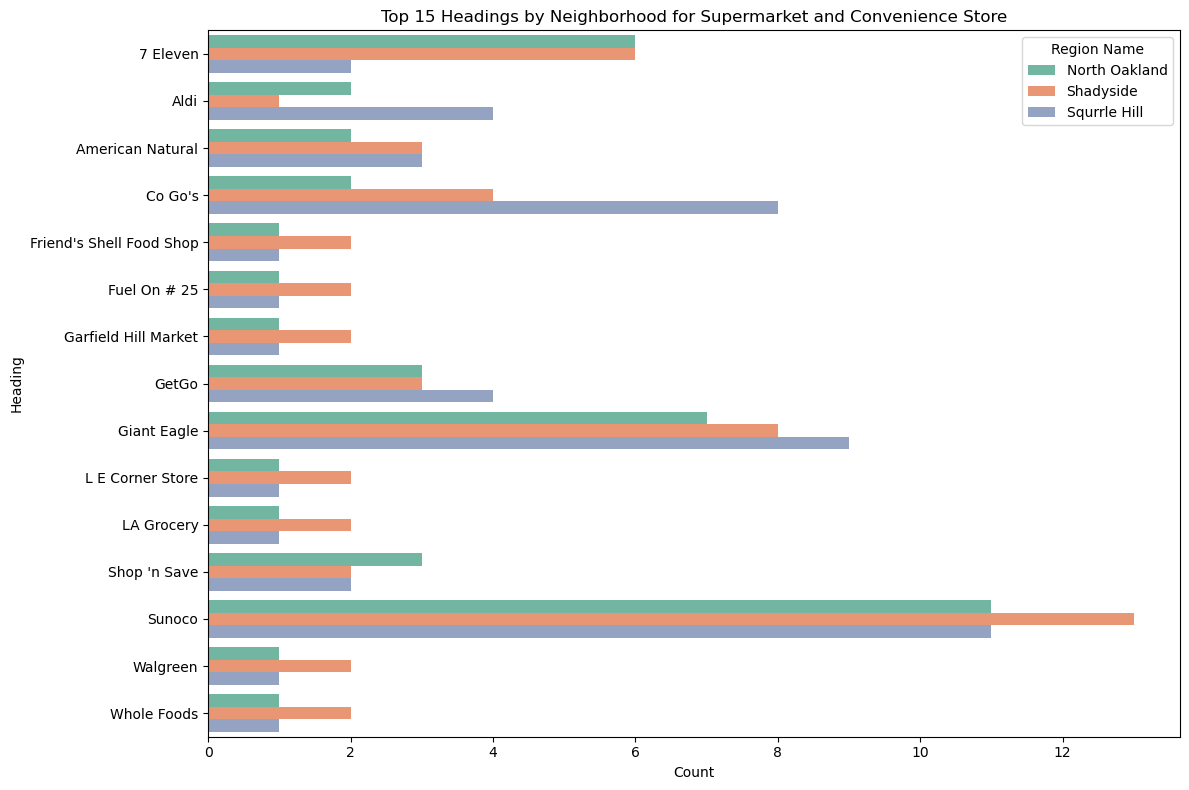

In [ ]:
market = dfnomiss[dfnomiss['Category'].isin(['Supermarket', 'Convenience Store'])]

# Get the top 15 values in the 'Heading' column
top_15_headings = market['Heading'].value_counts().head(15).index

# Filter data to include only the top 15 Headings
filtered_market = market[market['Heading'].isin(top_15_headings)]

# Calculate the frequency of each Heading and Neighborhood
heading_neighborhood_counts = filtered_market.groupby(['Heading', 'Region Name']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Heading', hue='Region Name', data=heading_neighborhood_counts, palette='Set2')
plt.title('Top 15 Headings by Neighborhood for Supermarket and Convenience Store')
plt.xlabel('Count')
plt.ylabel('Heading')
# Display the chart
plt.tight_layout()

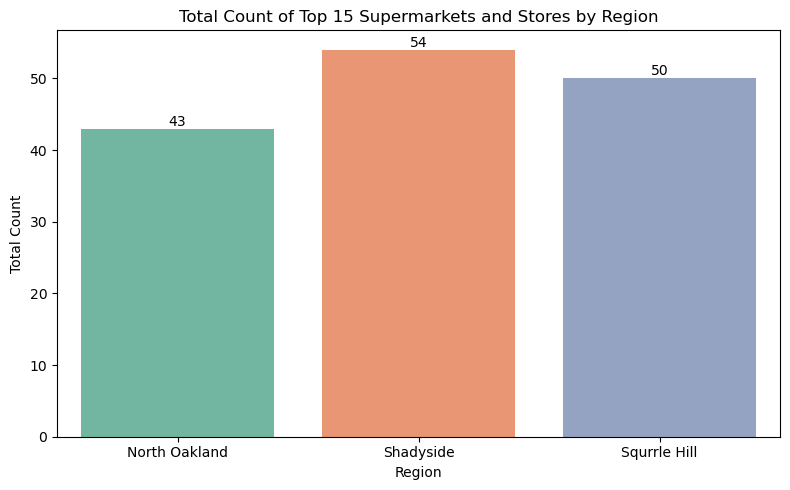

In [ ]:
market = dfnomiss[dfnomiss['Category'].isin(['Supermarket', 'Convenience Store'])]

# Get the top 15 values in the 'Heading' column
top_15_headings = market['Heading'].value_counts().head(15).index

# Filter data to include only the top 15 Headings
filtered_market = market[market['Heading'].isin(top_15_headings)]

# Calculate the frequency of each Heading and Neighborhood
heading_neighborhood_counts = filtered_market.groupby(['Heading', 'Region Name']).size().reset_index(name='Count')

# Aggregate counts by Region Name for the top 15 headings
region_totals = heading_neighborhood_counts.groupby('Region Name')['Count'].sum().reset_index()

# Set figure size
plt.figure(figsize=(8, 5))

# Use seaborn to plot the bar chart for total counts per region
sns.barplot(x='Region Name', y='Count', data=region_totals, palette='Set2')

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    plt.gca().annotate(f'{height:.0f}', (x, y), ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title('Total Count of Top 15 Supermarkets and Stores by Region')
plt.xlabel('Region')
plt.ylabel('Total Count')

# Display the chart
plt.tight_layout()
plt.show()


### **Conclusion:**
The two graphs show that Shadyside has the highest number of supermarkets and convenience stores, offering a variety of brands that cater to the needs of its residents. In contrast, the majority of stores in Squirrel Hill are convenience stores like Sunoco, which may be attributed to the area's housing composition, which is predominantly houses rather than apartments.